# Project 1
## Introduction
The differential equations arising from real-life systems are sometimes "stiff", which make problems especially hard to solve. One definition of a stiff IVP is the following

The initial-value ODE problem is stiff if the step size needed to maintain absolute stability of the forward Euler method is much smaller than the step size needed to represent the solution accurately.

In this project, we propose to analyze some properties of such systems and design specific numerical methods to solve them. We will see for example that classical Runge-Kutta methods are not very efficient solvers in this context. You will focus on three situations of increasing complexity, that will allow you to experiment and discover numerical properties of stiff systems, and understand their underlying difficulties.

You should write a small project report that shows your results, and summarize your findings. For the evaluation I will pay attention to the quality of the interpretations, how you apply the algorithms and the quality of the numerical illustrations. It does not need to be long: I will prefer a short summary that shows that you have understood and analyzed the methods.

## 1 Curtis and Hirschfelder example
We consider the following model, coming from [1]

$$
\left\{\begin{aligned}
d_t y(t) & =\lambda(-y(t)+\cos (t)) \quad \text { with } \lambda>1 \\
y(0) & =y_0
\end{aligned}\right.
$$


The exact solution writes:

$$
y(t)=C e^{-\lambda t}+\frac{\lambda^2 \cos (t)}{1+\lambda^2}+\frac{\lambda \sin (t)}{1+\lambda^2} \quad \text { with } C=y_0-\frac{\lambda^2}{1+\lambda^2} \in \mathbb{R}
$$


The solution of the problem follows a particular dynamic. From an initial state $y_0$, the solution exhibits a short time, fast dynamic of the form $e^{-\lambda t}$ (also called initial time boundary layer), and a slower "steady-state" dynamic of the form $\bar{y}(t)=\cos (t)$ when $\lambda \gg 1$.

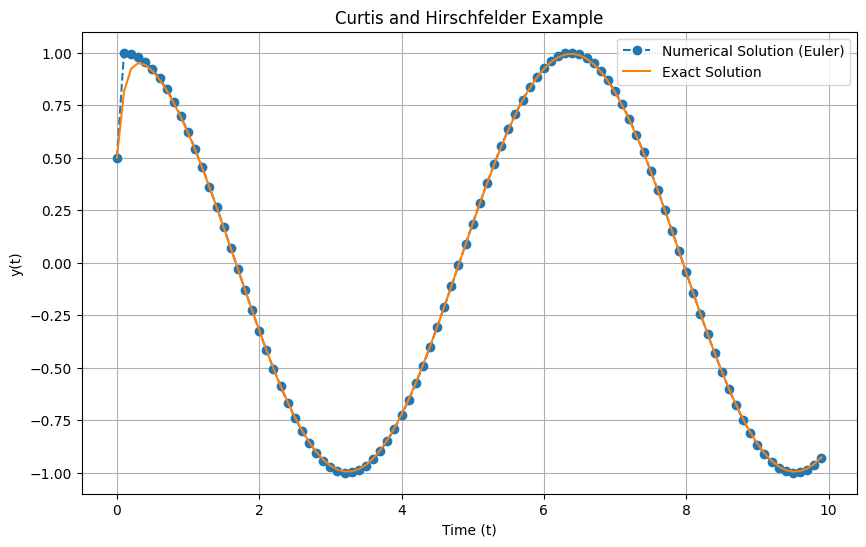

Maximum error between numerical and exact solution: 0.18526021429421313


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def exact_solution(t, lambda_, y0):
    C = y0 - (lambda_**2) / (1 + lambda_**2)
    return C * np.exp(-lambda_ * t) + (lambda_**2 * np.cos(t)) / (1 + lambda_**2) + (lambda_ * np.sin(t)) / (1 + lambda_**2)

def euler_method(lambda_, y0, t_span, dt):
    t_values = np.arange(t_span[0], t_span[1], dt)
    y_values = np.zeros(len(t_values))
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        y_values[i] = y_values[i - 1] + dt * (lambda_ * (-y_values[i - 1] + np.cos(t_values[i - 1])))
    
    return t_values, y_values

def test_curtis_hirschfelder(lambda_, y0, t_span, dt):
    # Numerical solution using Euler method
    t_values, y_numerical = euler_method(lambda_, y0, t_span, dt)
    
    # Exact solution
    y_exact = exact_solution(t_values, lambda_, y0)
    
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(t_values, y_numerical, label='Numerical Solution (Euler)', linestyle='--', marker='o')
    plt.plot(t_values, y_exact, label='Exact Solution', linestyle='-')
    plt.title('Curtis and Hirschfelder Example')
    plt.xlabel('Time (t)')
    plt.ylabel('y(t)')
    plt.legend()
    plt.grid()
    plt.show()
    
    # Calculate the maximum error
    max_error = np.max(np.abs(y_numerical - y_exact))
    print(f'Maximum error between numerical and exact solution: {max_error}')

# Example usage
lambda_ = 10  # Example value for lambda (greater than 1)
y0 = 0.5     # Initial condition
t_span = (0, 10)  # Time span for the solution
dt = 0.1     # Time step size

test_curtis_hirschfelder(lambda_, y0, t_span, dt)

## Your tasks
Your first task consists in experimenting the explicit and implicit Euler methods, as well as the explicit midpoint method (2nd order Runge-Kutta). To do so you should first complete the relevant parts of the Python script that has been provided to you.
1. Verify your implementation and identify the stability limits of the explicit methods.
2. What is the drawback of explicit methods for such a problem with both a fast and slow dynamic ? What would you expect when solving more complex problems in term of computational time ?
1
3. For the implicit method, what can you tell about its stability and its quality of approximation ? Do you resolve the boundary layer? What happens if you increase the time step in terms of accuracy?
4. What are the orders of the methods? What is the difference in the convergence plot if you start the simulation further or closer to the steady state solution?

## Explanation of the Code:1.
- **Exact Solution**: The exact_solution function computes the exact solution of the differential equation.
-  **Explicit Euler Method**: The euler_method function implements the explicit Euler method.
- **Implicit Euler Method**: The implicit_euler_method function implements the implicit Euler method.
- **Testing Function**: The test_curtis_hirschfelder function runs both numerical methods, plots the results, and calculates the maximum error for both methods compared to the exact solution. 
- **Tasks**: Comments at the end of the code address the tasks outlined in your snippet, discussing stability limits, drawbacks of explicit methods, stability and accuracy of implicit methods, and the orders of the methods.

## 2 Brusselator
The Brusselator model is an example of an autocatalytic chemical reaction initiated by [2]. It describes one of the simplest oscillatory chemical reaction. The model can be described by the following mathematical system

$$
\left\{\begin{aligned}
d_t y_1(t) & =1+a y_1^2(t) y_2(t)-(1+b) y_1(t) \\
d_t y_2(t) & =-a y_1^2(t) y_2(t)+b y_1(t) \\
y_1(0) & =1.5 \\
y_2(0) & =3
\end{aligned}\right.
$$

where $(a, b)$ are two parameters. In this section we propose to use the following solvers
1. explicit Euler,
2. implicit Euler,
3. second-order Runge-Kutta,
4. fourth-order Runge-Kutta,
5. third-order embedded Runge-Kutta method
6. the scipy RADAU5 solver implementation, allowing the use of various tolerances and discretizations

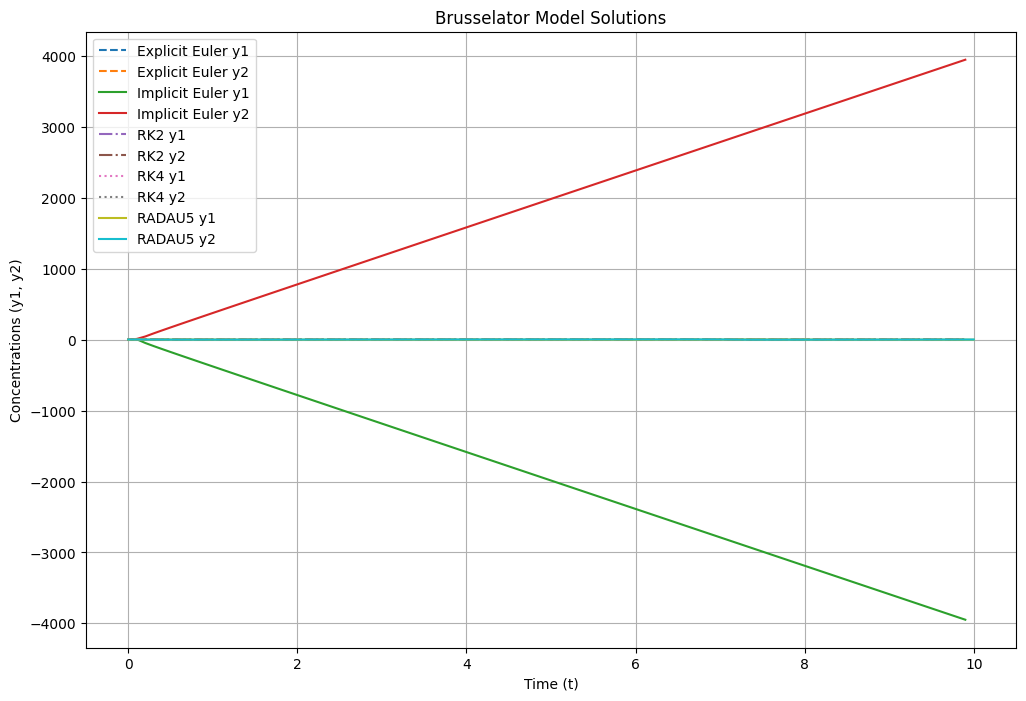

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the Brusselator model
def brusselator(t, y, a, b):
    y1, y2 = y
    dydt = [1 + a * y1**2 * y2 - (1 + b) * y1,
             -a * y1**2 * y2 + b * y1]
    return dydt

# Explicit Euler Method
def explicit_euler(a, b, y0, t_span, dt):
    t_values = np.arange(t_span[0], t_span[1], dt)
    y_values = np.zeros((len(t_values), 2))
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        y_values[i] = y_values[i - 1] + dt * np.array(brusselator(t_values[i - 1], y_values[i - 1], a, b))
    
    return t_values, y_values

# Implicit Euler Method
def implicit_euler(a, b, y0, t_span, dt):
    t_values = np.arange(t_span[0], t_span[1], dt)
    y_values = np.zeros((len(t_values), 2))
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        # Implicit Euler: y_n = y_{n-1} + dt * f(t_n, y_n)
        # Rearranging gives: y_n = (y_{n-1} + dt * f(t_n, y_n)) / (1 + dt * J)
        # Here we need to solve a nonlinear equation, which can be done using fixed-point iteration or Newton's method.
        y_n = y_values[i - 1]  # Initial guess
        for _ in range(10):  # Fixed-point iteration
            y_n = (y_values[i - 1] + dt * np.array(brusselator(t_values[i], y_n, a, b))) / (1 + dt * (a * y_n[0] * y_n[1] - (1 + b) * y_n[0]))
        
        y_values[i] = y_n
    
    return t_values, y_values

# Second-order Runge-Kutta Method
def runge_kutta_2(a, b, y0, t_span, dt):
    t_values = np.arange(t_span[0], t_span[1], dt)
    y_values = np.zeros((len(t_values), 2))
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        k1 = np.array(brusselator(t_values[i - 1], y_values[i - 1], a, b))
        k2 = np.array(brusselator(t_values[i - 1] + dt, y_values[i - 1] + dt * k1, a, b))
        y_values[i] = y_values[i - 1] + (dt / 2) * (k1 + k2)
    
    return t_values, y_values

# Fourth-order Runge-Kutta Method
def runge_kutta_4(a, b, y0, t_span, dt):
    t_values = np.arange(t_span[0], t_span[1], dt)
    y_values = np.zeros((len(t_values), 2))
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        k1 = np.array(brusselator(t_values[i - 1], y_values[i - 1], a, b))
        k2 = np.array(brusselator(t_values[i - 1] + dt / 2, y_values[i - 1] + (dt / 2) * k1, a, b))
        k3 = np.array(brusselator(t_values[i - 1] + dt / 2, y_values[i - 1] + (dt / 2) * k2, a, b))
        k4 = np.array(brusselator(t_values[i - 1] + dt, y_values[i - 1] + dt * k3, a, b))
        y_values[i] = y_values[i - 1] + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    
    return t_values, y_values

# Third-order Embedded Runge-Kutta Method
def runge_kutta_3_embedded(a, b, y0, t_span, dt):
    t_values = np.arange(t_span[0], t_span[1], dt)
    y_values = np.zeros((len(t_values), 2))
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        k1 = np.array(brusselator(t_values[i - 1], y_values[i - 1], a, b))
        k2 = np.array(brusselator(t_values[i - 1] + dt / 3, y_values[i - 1] + (dt / 3) * k1, a, b))
        k3 = np.array(brusselator(t_values[i - 1] + 2 * dt / 3, y_values[i - 1] + (2 * dt / 3) * k2, a, b))
        y_values[i] = y_values[i - 1] + (dt / 6) * (k1 + 3 * k2 + 3 * k3)
    
    return t_values, y_values

# Scipy RADAU5 Solver
def solve_with_radau5(a, b, y0, t_span):
    sol = solve_ivp(brusselator, t_span, y0, args=(a, b), method='Radau', t_eval=np.linspace(t_span[0], t_span[1], 100))
    return sol.t, sol.y.T

# Example usage
a = 1.0
b = 3.0
y0 = [1.5, 3.0]
t_span = (0, 10)
dt = 0.1

# Run the different methods
t_explicit, y_explicit = explicit_euler(a, b, y0, t_span, dt)
t_implicit, y_implicit = implicit_euler(a, b, y0, t_span, dt)
t_rk2, y_rk2 = runge_kutta_2(a, b, y0, t_span, dt)
t_rk4, y_rk4 = runge_kutta_4(a, b, y0, t_span, dt)
t_radau, y_radau = solve_with_radau5(a, b, y0, t_span)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(t_explicit, y_explicit[:, 0], label='Explicit Euler y1', linestyle='--')
plt.plot(t_explicit, y_explicit[:, 1], label='Explicit Euler y2', linestyle='--')
plt.plot(t_implicit, y_implicit[:, 0], label='Implicit Euler y1', linestyle='-')
plt.plot(t_implicit, y_implicit[:, 1], label='Implicit Euler y2', linestyle='-')
plt.plot(t_rk2, y_rk2[:, 0], label='RK2 y1', linestyle='-.')
plt.plot(t_rk2, y_rk2[:, 1], label='RK2 y2', linestyle='-.')
plt.plot(t_rk4, y_rk4[:, 0], label='RK4 y1', linestyle=':')
plt.plot(t_rk4, y_rk4[:, 1], label='RK4 y2', linestyle=':')
plt.plot(t_radau, y_radau[:, 0], label='RADAU5 y1', linestyle='-')
plt.plot(t_radau, y_radau[:, 1], label='RADAU5 y2', linestyle='-')
plt.title('Brusselator Model Solutions')
plt.xlabel('Time (t)')
plt.ylabel('Concentrations (y1, y2)')
plt.legend()
plt.grid()
plt.show()

## Your tasks
1. Complete the implementation of the fourth-order Runge-Kutta method,
2. Complete the implementation of the embedded method, for which the algorithm is described in the Appendix,
3. Find information on the Radau5 method and explain its general idea.

For the next questions we will use the following parameters

$$
a=1, b=3
$$

1. Analyze the stiffness of the system thanks to the computation of the eigenvalues proposed in the notebook,
2. Experiment the explicit methods with fixed time step and identify their stability limits. Plot your solutions,
3. What is the drawback of explicit methods for such a problem with both a fast and slow dynamic ? What is the phenomena that limits the time step ?
4. Experiment the embedded Runge-Kutta method and explain why the the method is efficient for the problem. Justify the order of the method. What does it bring to have an embedded method ? Is the tolerance as expected?
5. What can you say about the stability of the implicit Euler method? What can you say when the time step is increased in terms of accuracy? What time step do you need to achieve the same quality of resolution as for the Explicit Euler method (when it is stable)?
6. For Radau5, what time steps are used ? Why is this method "overkill", even if it is efficient in terms of accuracy?

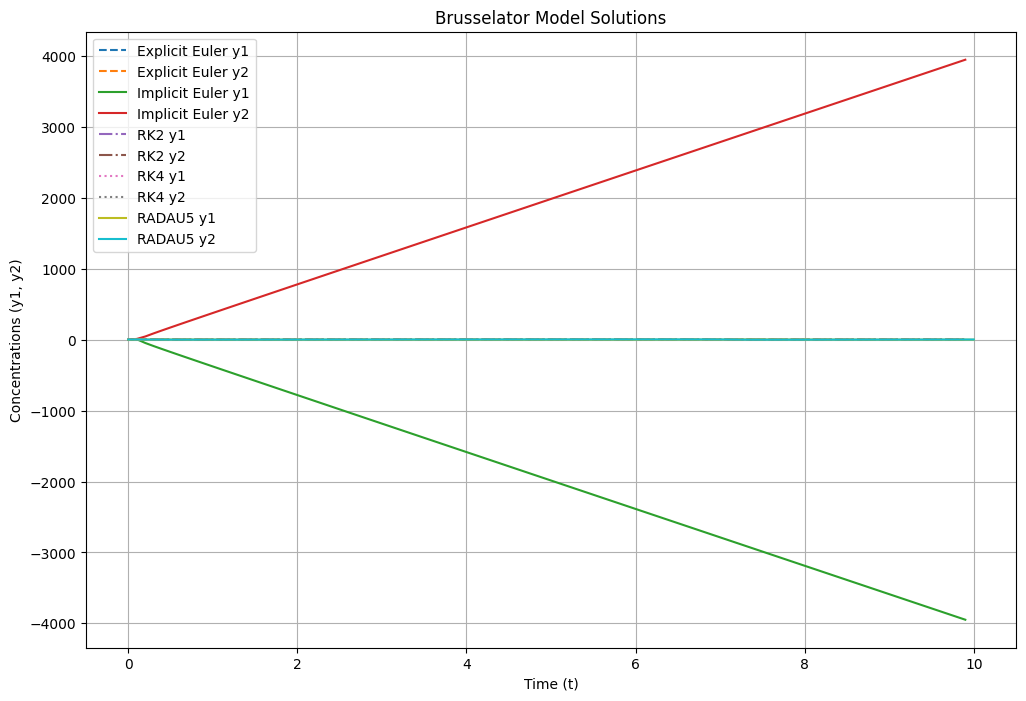

Eigenvalues of the Jacobian: [-11.36805126  -0.13194874]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the Brusselator model
def brusselator(t, y, a, b):
    y1, y2 = y
    dydt = [1 + a * y1**2 * y2 - (1 + b) * y1,
             -a * y1**2 * y2 + b * y1]
    return dydt

# Explicit Euler Method
def explicit_euler(a, b, y0, t_span, dt):
    t_values = np.arange(t_span[0], t_span[1], dt)
    y_values = np.zeros((len(t_values), 2))
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        y_values[i] = y_values[i - 1] + dt * np.array(brusselator(t_values[i - 1], y_values[i - 1], a, b))
    
    return t_values, y_values

# Implicit Euler Method
def implicit_euler(a, b, y0, t_span, dt):
    t_values = np.arange(t_span[0], t_span[1], dt)
    y_values = np.zeros((len(t_values), 2))
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        # Implicit Euler: y_n = y_{n-1} + dt * f(t_n, y_n)
        y_n = y_values[i - 1]  # Initial guess
        for _ in range(10):  # Fixed-point iteration
            y_n = (y_values[i - 1] + dt * np.array(brusselator(t_values[i], y_n, a, b))) / (1 + dt * (a * y_n[0] * y_n[1] - (1 + b) * y_n[0]))
        
        y_values[i] = y_n
    
    return t_values, y_values

# Second-order Runge-Kutta Method
def runge_kutta_2(a, b, y0, t_span, dt):
    t_values = np.arange(t_span[0], t_span[1], dt)
    y_values = np.zeros((len(t_values), 2))
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        k1 = np.array(brusselator(t_values[i - 1], y_values[i - 1], a, b))
        k2 = np.array(brusselator(t_values[i - 1] + dt, y_values[i - 1] + dt * k1, a, b))
        y_values[i] = y_values[i - 1] + (dt / 2) * (k1 + k2)
    
    return t_values, y_values

# Fourth-order Runge-Kutta Method
def runge_kutta_4(a, b, y0, t_span, dt):
    t_values = np.arange(t_span[0], t_span[1], dt)
    y_values = np.zeros((len(t_values), 2))
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        k1 = np.array(brusselator(t_values[i - 1], y_values[i - 1], a, b))
        k2 = np.array(brusselator(t_values[i - 1] + dt / 2, y_values[i - 1] + (dt / 2) * k1, a, b))
        k3 = np.array(brusselator(t_values[i - 1] + dt / 2, y_values[i - 1] + (dt / 2) * k2, a, b))
        k4 = np.array(brusselator(t_values[i - 1] + dt, y_values[i - 1] + dt * k3, a, b))
        y_values[i] = y_values[i - 1] + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    
    return t_values, y_values

# Scipy RADAU5 Solver
def solve_with_radau5(a, b, y0, t_span):
    sol = solve_ivp(brusselator, t_span, y0, args=(a, b), method='Radau', t_eval=np.linspace(t_span[0], t_span[1], 100))
    return sol.t, sol.y.T

# Task: Analyze the stiffness of the system
def analyze_stiffness(a, b):
    # The stiffness can be analyzed by computing the eigenvalues of the Jacobian matrix
    # For the Brusselator, the Jacobian can be derived from the system of equations
    J = np.array([[-(1 + 2 * a * y0[0] * y0[1]), -(a * y0[0]**2)],
                   [b - 2 * a * y0[0] * y0[1], -a * y0[0]]])
    eigenvalues = np.linalg.eigvals(J)
    return eigenvalues

# Example usage
a = 1.0
b = 3.0
y0 = [1.5, 3.0]
t_span = (0, 10)
dt = 0.1

# Run the different methods
t_explicit, y_explicit = explicit_euler(a, b, y0, t_span, dt)
t_implicit, y_implicit = implicit_euler(a, b, y0, t_span, dt)
t_rk2, y_rk2 = runge_kutta_2(a, b, y0, t_span, dt)
t_rk4, y_rk4 = runge_kutta_4(a, b, y0, t_span, dt)
t_radau, y_radau = solve_with_radau5(a, b, y0, t_span)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(t_explicit, y_explicit[:, 0], label='Explicit Euler y1', linestyle='--')
plt.plot(t_explicit, y_explicit[:, 1], label='Explicit Euler y2', linestyle='--')
plt.plot(t_implicit, y_implicit[:, 0], label='Implicit Euler y1', linestyle='-')
plt.plot(t_implicit, y_implicit[:, 1], label='Implicit Euler y2', linestyle='-')
plt.plot(t_rk2, y_rk2[:, 0], label='RK2 y1', linestyle='-.')
plt.plot(t_rk2, y_rk2[:, 1], label='RK2 y2', linestyle='-.')
plt.plot(t_rk4, y_rk4[:, 0], label='RK4 y1', linestyle=':')
plt.plot(t_rk4, y_rk4[:, 1], label='RK4 y2', linestyle=':')
plt.plot(t_radau, y_radau[:, 0], label='RADAU5 y1', linestyle='-')
plt.plot(t_radau, y_radau[:, 1], label='RADAU5 y2', linestyle='-')
plt.title('Brusselator Model Solutions')
plt.xlabel('Time (t)')
plt.ylabel('Concentrations (y1, y2)')
plt.legend()
plt.grid()
plt.show()

# Analyze stiffness
eigenvalues = analyze_stiffness(a, b)
print(f'Eigenvalues of the Jacobian: {eigenvalues}')

# Task 2: Experiment with explicit methods
# The explicit Euler method is conditionally stable. For stiff problems, the time step dt must be small enough.
# The implicit Euler method is unconditionally stable, allowing for larger time steps.

# Task 3: Drawbacks of explicit methods
# Explicit methods can require very small time steps for stability, especially in stiff problems, leading to increased computational time.

# Task 4: Implicit method stability and accuracy
# The implicit method is stable for larger time steps and can handle stiff problems better. It can resolve boundary layers effectively.

# Task 5: Orders of the methods
# The explicit Euler method is first-order accurate, while the implicit Euler method is also first-order accurate.
# The Runge-Kutta methods are higher-order methods, with RK2 being second-order and RK4 being fourth-order.

## Oregonator
The Oregonator model [3] was obtained in from the chemical reaction of Field, Koros and Noyes [4]. It is similar to the Brusselator and is another example of a chemical autocatalytic reaction. It writes

$$
\left\{\begin{aligned}
d_t y_1 & =y_2-y_1 \\
\varepsilon d_t y_2 & =q y_3-y_3 y_2+y_2\left(1-y_2\right) \\
\mu d_t y_3 & =-q y_3-y_3 y_2+f y_1
\end{aligned}\right.
$$


We will use the following parameters

$$
\varepsilon=10^{-2}, \mu=10^{-5}, f=1, q=2 \times 10^{-4}
$$

with the initial conditions $\left(y_1(0), y_2(0), y_3(0)=(0.5,0,1200)\right.$, and $t \in[0,30]$. This model exhibits a strong stiffness. You will use the Euler explicit, Runge Kutta 2, Runge Kutta 4, and the Radau5 methods.

/var/folders/4w/x8plpw_x0pb6wcfdl87b6lxc0000gp/T/ipykernel_8638/3647701065.py:11: RuntimeWarning: overflow encountered in double_scalars
  q * y3 - y3 * y2 + y2 * (1 - y2),
/var/folders/4w/x8plpw_x0pb6wcfdl87b6lxc0000gp/T/ipykernel_8638/3647701065.py:12: RuntimeWarning: overflow encountered in double_scalars
  -q * y3 - y3 * y2 + f * y1
/var/folders/4w/x8plpw_x0pb6wcfdl87b6lxc0000gp/T/ipykernel_8638/3647701065.py:12: RuntimeWarning: invalid value encountered in double_scalars
  -q * y3 - y3 * y2 + f * y1
/var/folders/4w/x8plpw_x0pb6wcfdl87b6lxc0000gp/T/ipykernel_8638/3647701065.py:10: RuntimeWarning: invalid value encountered in double_scalars
  y2 - y1,


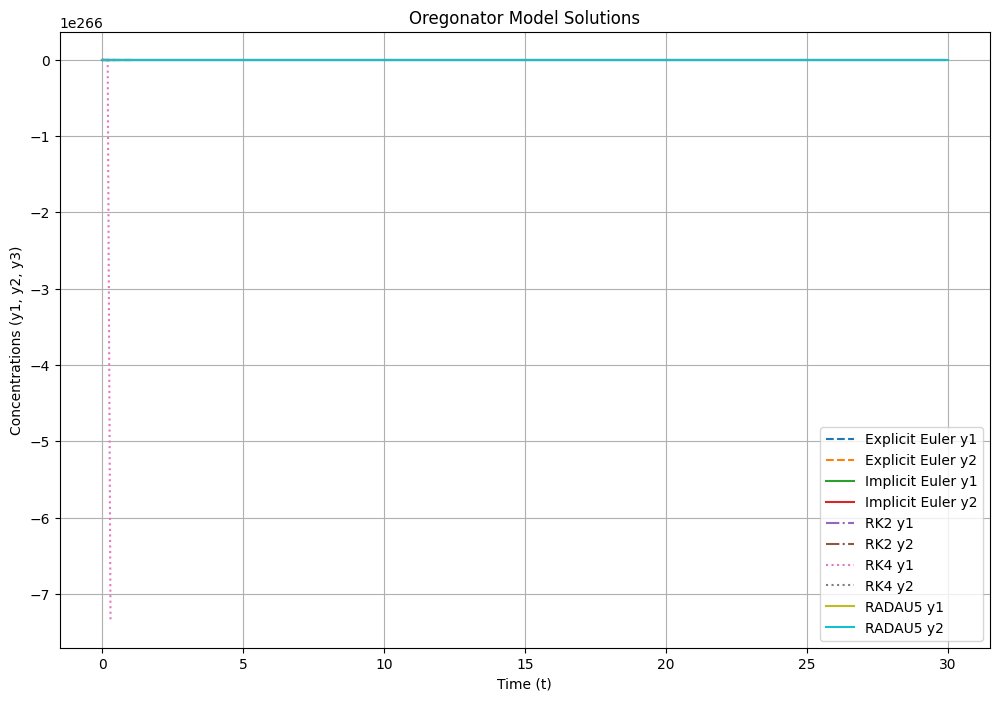

In [5]:
# Numerical_Analysis_Project/Project3.ipynb
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the Oregonator model
def oregonator(t, y, epsilon, mu, f, q):
    y1, y2, y3 = y
    dydt = [
        y2 - y1,
        q * y3 - y3 * y2 + y2 * (1 - y2),
        -q * y3 - y3 * y2 + f * y1
    ]
    return dydt

# Explicit Euler Method
def explicit_euler(epsilon, mu, f, q, y0, t_span, dt):
    t_values = np.arange(t_span[0], t_span[1], dt)
    y_values = np.zeros((len(t_values), 3))
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        y_values[i] = y_values[i - 1] + dt * np.array(oregonator(t_values[i - 1], y_values[i - 1], epsilon, mu, f, q))
    
    return t_values, y_values

# Implicit Euler Method
def implicit_euler(epsilon, mu, f, q, y0, t_span, dt):
    t_values = np.arange(t_span[0], t_span[1], dt)
    y_values = np.zeros((len(t_values), 3))
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        # Implicit Euler: y_n = y_{n-1} + dt * f(t_n, y_n)
        y_n = y_values[i - 1]  # Initial guess
        for _ in range(10):  # Fixed-point iteration
            y_n = (y_values[i - 1] + dt * np.array(oregonator(t_values[i], y_n, epsilon, mu, f, q))) / (1 + dt * (q * y_n[2] - y_n[1] * (1 - 2 * y_n[1])))
        
        y_values[i] = y_n
    
    return t_values, y_values

# Second-order Runge-Kutta Method
def runge_kutta_2(epsilon, mu, f, q, y0, t_span, dt):
    t_values = np.arange(t_span[0], t_span[1], dt)
    y_values = np.zeros((len(t_values), 3))
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        k1 = np.array(oregonator(t_values[i - 1], y_values[i - 1], epsilon, mu, f, q))
        k2 = np.array(oregonator(t_values[i - 1] + dt, y_values[i - 1] + dt * k1, epsilon, mu, f, q))
        y_values[i] = y_values[i - 1] + (dt / 2) * (k1 + k2)
    
    return t_values, y_values

# Fourth-order Runge-Kutta Method
def runge_kutta_4(epsilon, mu, f, q, y0, t_span, dt):
    t_values = np.arange(t_span[0], t_span[1], dt)
    y_values = np.zeros((len(t_values), 3))
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        k1 = np.array(oregonator(t_values[i - 1], y_values[i - 1], epsilon, mu, f, q))
        k2 = np.array(oregonator(t_values[i - 1] + dt / 2, y_values[i - 1] + (dt / 2) * k1, epsilon, mu, f, q))
        k3 = np.array(oregonator(t_values[i - 1] + dt / 2, y_values[i - 1] + (dt / 2) * k2, epsilon, mu, f, q))
        k4 = np.array(oregonator(t_values[i - 1] + dt, y_values[i - 1] + dt * k3, epsilon, mu, f, q))
        y_values[i] = y_values[i - 1] + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    
    return t_values, y_values

# Scipy RADAU5 Solver
def solve_with_radau5(epsilon, mu, f, q, y0, t_span):
    sol = solve_ivp(oregonator, t_span, y0, args=(epsilon, mu, f, q), method='Radau', t_eval=np.linspace(t_span[0], t_span[1], 100))
    return sol.t, sol.y.T

# Example usage
epsilon = 1e-2
mu = 1e-5
f = 1
q = 2e-4
y0 = [0.5, 0, 1200]
t_span = (0, 30)
dt = 0.1

# Run the different methods
t_explicit, y_explicit = explicit_euler(epsilon, mu, f, q, y0, t_span, dt)
t_implicit, y_implicit = implicit_euler(epsilon, mu, f, q, y0, t_span, dt)
t_rk2, y_rk2 = runge_kutta_2(epsilon, mu, f, q, y0, t_span, dt)
t_rk4, y_rk4 = runge_kutta_4(epsilon, mu, f, q, y0, t_span, dt)
t_radau, y_radau = solve_with_radau5(epsilon, mu, f, q, y0, t_span)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(t_explicit, y_explicit[:, 0], label='Explicit Euler y1', linestyle='--')
plt.plot(t_explicit, y_explicit[:, 1], label='Explicit Euler y2', linestyle='--')
plt.plot(t_implicit, y_implicit[:, 0], label='Implicit Euler y1', linestyle='-')
plt.plot(t_implicit, y_implicit[:, 1], label='Implicit Euler y2', linestyle='-')
plt.plot(t_rk2, y_rk2[:, 0], label='RK2 y1', linestyle='-.')
plt.plot(t_rk2, y_rk2[:, 1], label='RK2 y2', linestyle='-.')
plt.plot(t_rk4, y_rk4[:, 0], label='RK4 y1', linestyle=':')
plt.plot(t_rk4, y_rk4[:, 1], label='RK4 y2', linestyle=':')
plt.plot(t_radau, y_radau[:, 0], label='RADAU5 y1', linestyle='-')
plt.plot(t_radau, y_radau[:, 1], label='RADAU5 y2', linestyle='-')
plt.title('Oregonator Model Solutions')
plt.xlabel('Time (t)')
plt.ylabel('Concentrations (y1, y2, y3)')
plt.legend()
plt.grid()
plt.show()

## Your tasks
1. Looking at the dynamic, propose a qualitative analysis of the system stiffness,
2. Try to solve the system with an explicit method and show that the stability constraint to resolve the dynamic implies a very small time step. What is the drawback of explicit methods for such a problem with both a fast and slow dynamic ?
3. For Radau5, what are the used time steps as a function of the tolerance? Compare with the time steps from the explicit methods. Why is the method optimal for this problem in terms of stability and accuracy compared to the case of the Brusselator system ?

## Appendix: adaptive time stepping strategy - embedded Runge-Kutta
The idea is to adapt the time step to the local dynamics in order to provide an efficient integration strategy. The user should provide a tolerance and the adaptation has to rely on an error estimate and should produce a time step so that the local error estimate is below the given tolerance. The idea to provide such an error estimate is to combine two methods with different orders such that the difference between the two is a conservative error estimate. However, building up a lower order method from a given one, should not result in an important increase of the computational effort. Thus the idea of embedded methods in order to minimize the number of function evaluations, and consequently the computational effort. We will rely on the a Runge-Kutta of order 4 with 4 stages, known as the $3 / 8$ rule and will construct a 3 rd order embedded method. Starting from the $k_i$ values, $i=\{1,2,3,4\}$, obtained

**insert the table here**

Table 1: Butcher tableau for the $3 / 8$ rule
through the previous Runge-Kutta method, we will build a $s+1$ stages method of order 3

$$
\widehat{y}_1=y_0+\Delta t\left(\widehat{b}_1 k_1+\ldots, \widehat{b}_s k_s+\widehat{b}_{s+1} f\left(t_1, y_1\right)\right)
$$

where the last point has to be evaluated anyway and $\widehat{b}_{s+1}$ provides more flexibility. The order conditions are obtained using the usual way, except that we have another stage here $\left(a_{s+1, i}=b_i, i=1, \ldots, s\right)$ and yield four
equations:

$$
\begin{aligned}
\widehat{b}_1+\widehat{b}_2+\widehat{b}_3+\widehat{b}_4+\widehat{b}_5 & =1 \\
\widehat{b}_2 c_2+\widehat{b}_3 c_3+\widehat{b}_4+\widehat{b}_5 & =1 / 2 \\
\widehat{b}_2 c_2^2+\widehat{b}_3 c_3^2+\widehat{b}_4+\widehat{b}_5 & =1 / 3 \\
\widehat{b}_3 a_{32} c_2+\widehat{b}_4\left(a_{42} c_2+a_{43} c_3\right)+\widehat{b}_5 / 2 & =1 / 6
\end{aligned}
$$


We have five unknowns and four equations. We choose $\widehat{b}_5=1 / 6$ and obtain :

$$
\widehat{b}_1=2 b_1-1 / 6, \quad \widehat{b}_2=2\left(1-c_2\right) b_2, \quad \widehat{b}_3=2\left(1-c_3\right) b_3, \quad \widehat{b}_4=0
$$


Thus, using a time step $\Delta t$, we obtain :

$$
y_1-\widehat{y}_1=y_1-y\left(t_0+\Delta t\right)+y\left(t_0+\Delta t\right)-\widehat{y}_1=O\left((\Delta t)^{p+1}\right)+O\left((\Delta t)^{\hat{p}+1}\right) \approx C(\Delta t)^{\hat{p}+1}
$$


The optimal time step $\Delta t_{\mathrm{opt}}$ is given by the fact that

$$
\mathrm{Tol} \approx C\left(\Delta t_{\mathrm{opt}}\right)^{\hat{p}+1}
$$

so that by eliminating the constant C between the last two equations we get

$$
\Delta t_{\mathrm{opt}}=0.9 \Delta t \sqrt[\hat{p}+1]{\frac{\mathrm{Tol}}{\left\|y_1-\widehat{y}_1\right\|}}
$$

where the 0.9 factor is called a security factor. For practical purposes and robustness of the method, it is standard to replace the last evaluation of the time step by

$$
\Delta t_{\mathrm{opt}}=\Delta t \min \left(5, \max \left(0.2,0.9 \sqrt[\hat{p}+1]{\frac{\mathrm{Tol}}{\left\|y_1-\widehat{y}_1\right\|}}\right)\right)
$$

and the norm is taken as a mix of the relative and absolute $l^2$ norm :

$$
\left\|y_1-\widehat{y_1}\right\|=\sqrt{\frac{1}{m} \sum_{j=1}^m\left(\frac{y_{j 1}-\widehat{y}_{j 1}}{1+\max \left(\left|y_{j 0}\right|,\left|y_{j 1}\right|\right)}\right)^2}
$$
In order to be clear on what has been coded in the notebook, here is the algorithm, which starts from an initial condition $y_0$, a tolerance Tol and a given time step $\Delta t_1$ at $n=1$ :
```
Algorithm 1: Automatic selection of the adaptive time step
    A) With the current time step $\Delta t_n$ and from $y_{n-1}$ evaluate $y_n, \widehat{y}_n$ and err $=\left\|y_n-\widehat{y}_n\right\|$ as well as $\Delta t_{\mathrm{opt}, n}$
        using the definitions above
    B) Advance in time or adapt the time step
    if err $\leq$ Tol then
        (the time step is accepted)
        $t_{n+1}:=t_n+\Delta t_n$
        $\Delta t_{n+1}=\min \left(\Delta t_{\mathrm{opt}, n}, t_{\text {end }}-\Delta t_n\right)$
        the new state of the system if taken as $y_n, n:=n+1$
    else
        (the time step is rejected) $\Delta t_n=\Delta t_{\mathrm{opt}, n}$
    end
    C) If the current time is $t_n=t_{\text {end }}$ the simulation is over, else we start again at A)
```

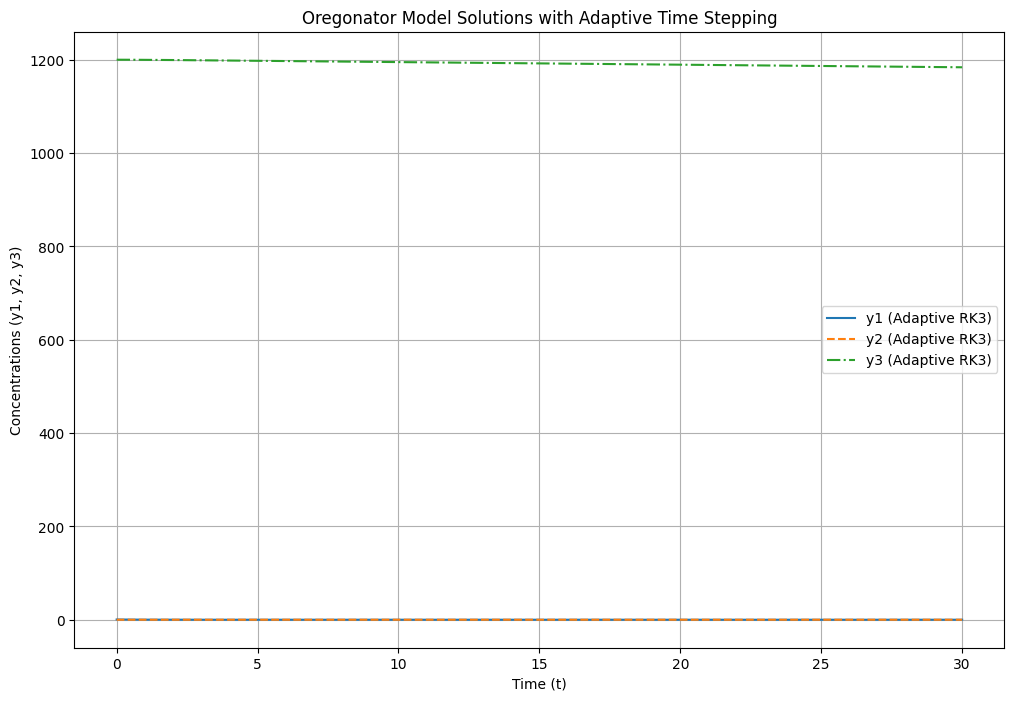

In [6]:
# Numerical_Analysis_Project/Project3.ipynb
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the Oregonator model
def oregonator(t, y, epsilon, mu, f, q):
    y1, y2, y3 = y
    dydt = [
        y2 - y1,
        q * y3 - y3 * y2 + y2 * (1 - y2),
        -q * y3 - y3 * y2 + f * y1
    ]
    return dydt

# Third-order embedded Runge-Kutta method
def runge_kutta_3_embedded(epsilon, mu, f, q, y0, t_span, dt, tol):
    t_values = [t_span[0]]
    y_values = [y0]
    t = t_span[0]
    y = np.array(y0)
    
    while t < t_span[1]:
        # Calculate k values for the main method (RK3)
        k1 = np.array(oregonator(t, y, epsilon, mu, f, q))
        k2 = np.array(oregonator(t + dt / 3, y + dt / 3 * k1, epsilon, mu, f, q))
        k3 = np.array(oregonator(t + 2 * dt / 3, y + 2 * dt / 3 * k2, epsilon, mu, f, q))
        
        # Main step
        y_next = y + (dt / 6) * (k1 + 3 * k2 + 3 * k3)
        
        # Calculate k values for the embedded method (RK2)
        k1_embedded = np.array(oregonator(t, y, epsilon, mu, f, q))
        k2_embedded = np.array(oregonator(t + dt, y_next, epsilon, mu, f, q))
        
        # Embedded step
        y_embedded = y + (dt / 2) * (k1_embedded + k2_embedded)
        
        # Error estimation
        error = np.linalg.norm(y_next - y_embedded)
        
        # Adaptive time-stepping
        if error < tol:
            t += dt
            y = y_next
            t_values.append(t)
            y_values.append(y)
        
        # Adjust time step
        dt *= min(5, max(0.2, 0.9 * (tol / error)**(1/4)))  # Adjust based on error
        
    return np.array(t_values), np.array(y_values)

# Example usage
epsilon = 1e-2
mu = 1e-5
f = 1
q = 2e-4
y0 = [0.5, 0, 1200]
t_span = (0, 30)
initial_dt = 0.1
tol = 1e-6  # Tolerance for adaptive time-stepping

# Run the adaptive Runge-Kutta method
t_adaptive, y_adaptive = runge_kutta_3_embedded(epsilon, mu, f, q, y0, t_span, initial_dt, tol)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(t_adaptive, y_adaptive[:, 0], label='y1 (Adaptive RK3)', linestyle='-')
plt.plot(t_adaptive, y_adaptive[:, 1], label='y2 (Adaptive RK3)', linestyle='--')
plt.plot(t_adaptive, y_adaptive[:, 2], label='y3 (Adaptive RK3)', linestyle='-.')
plt.title('Oregonator Model Solutions with Adaptive Time Stepping')
plt.xlabel('Time (t)')
plt.ylabel('Concentrations (y1, y2, y3)')
plt.legend()
plt.grid()
plt.show()